MODELO: Prophet, MAPE: 0.38637, POCID: 81.81818, PBE: 42.71371, MASE: 0.97474


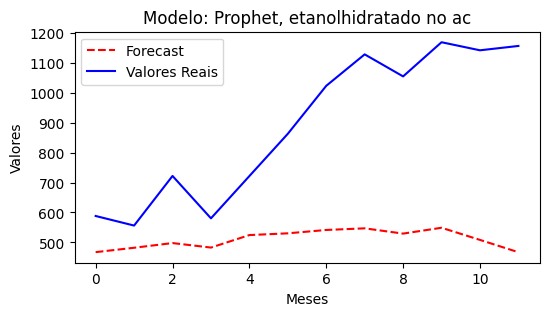

MODELO: Prophet, MAPE: 0.14131, POCID: 45.45455, PBE: 7.85546, MASE: 0.45343


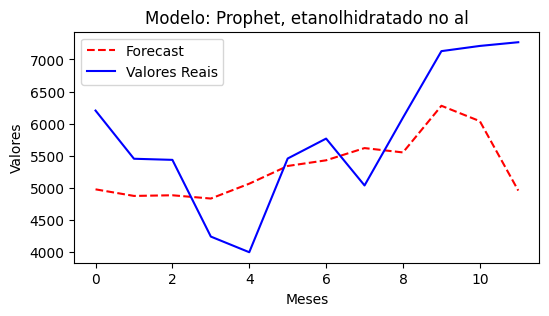

MODELO: Prophet, MAPE: 0.28326, POCID: 72.72727, PBE: 28.51031, MASE: 1.00144


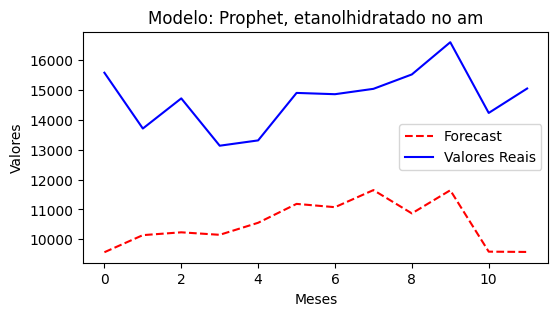

MODELO: Prophet, MAPE: 0.40979, POCID: 36.36364, PBE: 44.80470, MASE: 0.86508


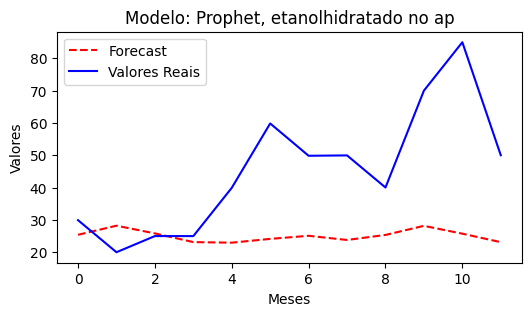

MODELO: Prophet, MAPE: 0.15017, POCID: 63.63636, PBE: 11.07538, MASE: 0.52853


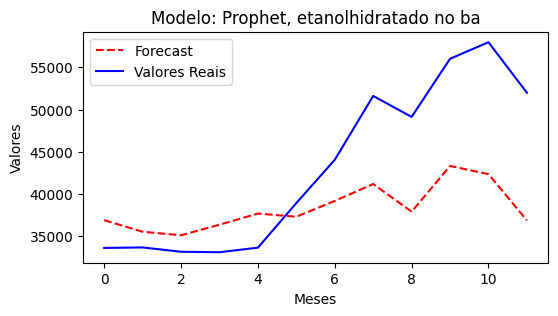

MODELO: Prophet, MAPE: 0.25701, POCID: 63.63636, PBE: 29.23768, MASE: 0.79610


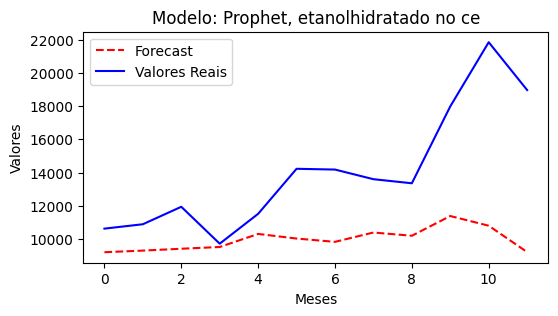

MODELO: Prophet, MAPE: 0.54547, POCID: 72.72727, PBE: 60.50825, MASE: 0.97970


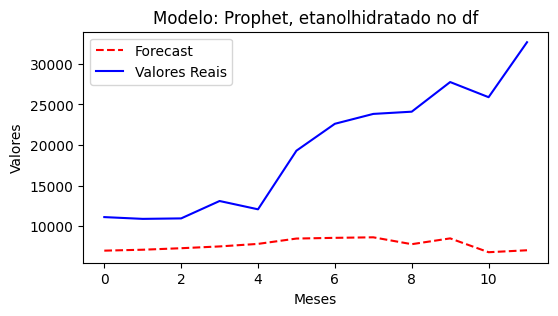

MODELO: Prophet, MAPE: 0.36531, POCID: 63.63636, PBE: 51.37468, MASE: 0.88109


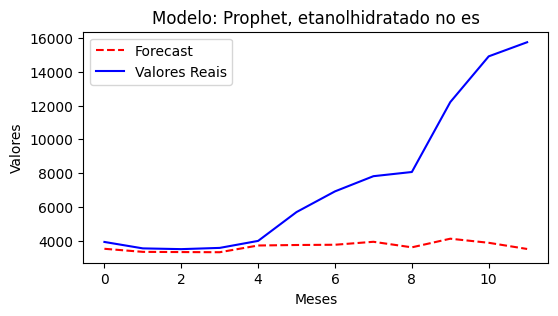

MODELO: Prophet, MAPE: 0.11601, POCID: 63.63636, PBE: 6.06537, MASE: 0.52950


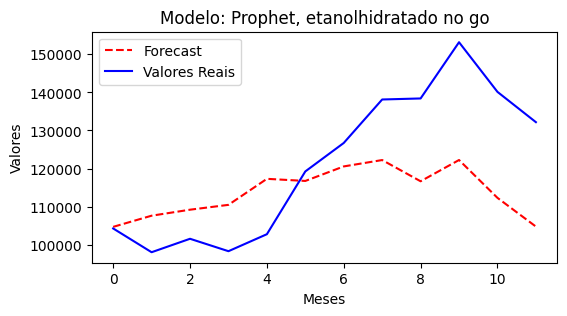

MODELO: Prophet, MAPE: 0.18618, POCID: 54.54545, PBE: 14.58958, MASE: 0.43072


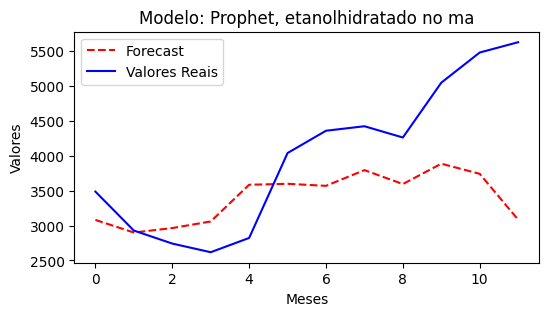

MODELO: Prophet, MAPE: 0.17936, POCID: 81.81818, PBE: 5.79020, MASE: 0.52375


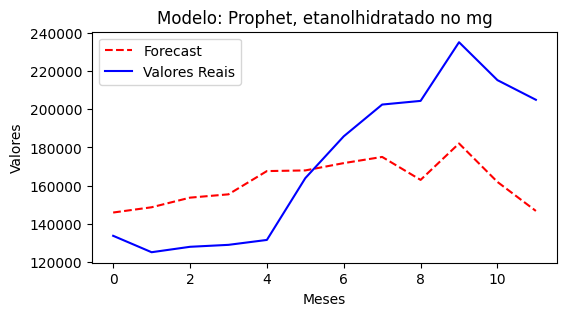

MODELO: Prophet, MAPE: 0.30068, POCID: 72.72727, PBE: 39.17530, MASE: 0.83842


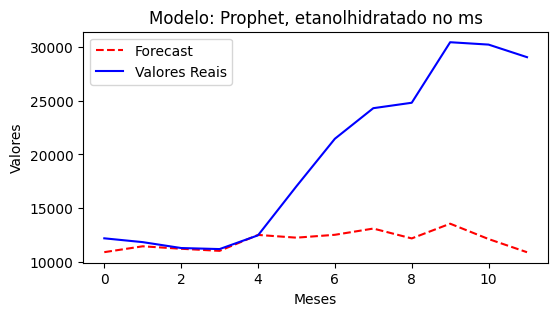

MODELO: Prophet, MAPE: 0.16380, POCID: 45.45455, PBE: 16.98505, MASE: 1.28931


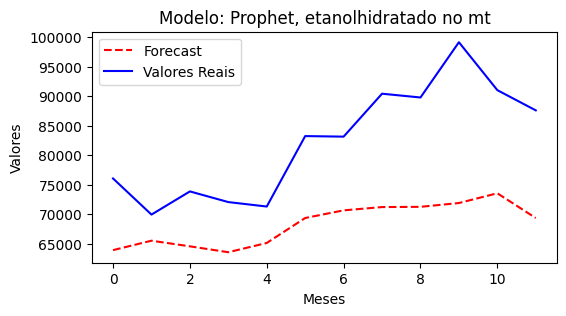

MODELO: Prophet, MAPE: 0.32069, POCID: 36.36364, PBE: 38.43064, MASE: 0.88834


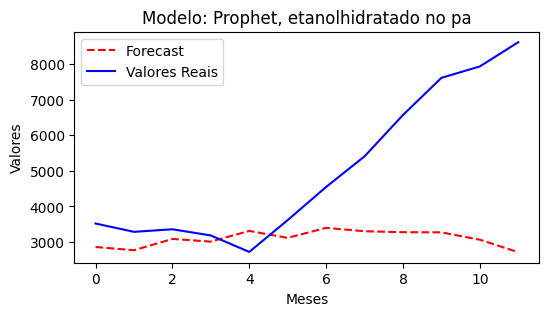

MODELO: Prophet, MAPE: 0.17526, POCID: 72.72727, PBE: 18.66052, MASE: 0.52276


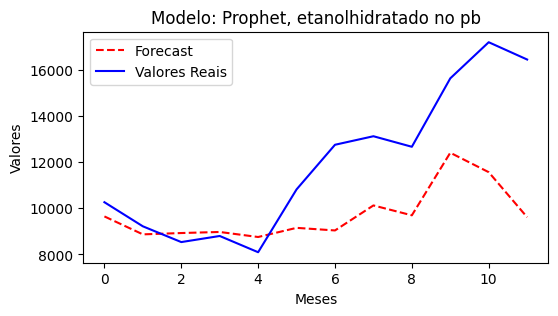

MODELO: Prophet, MAPE: 0.16668, POCID: 54.54545, PBE: 17.26003, MASE: 0.50288


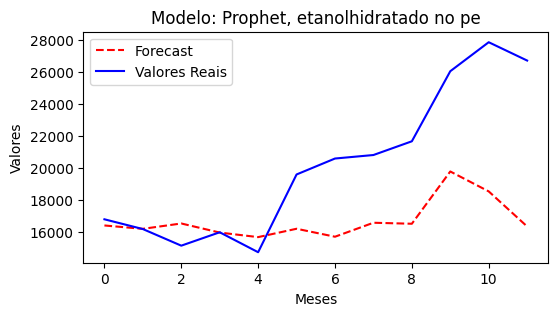

MODELO: Prophet, MAPE: 0.24955, POCID: 81.81818, PBE: -20.96266, MASE: 0.53246


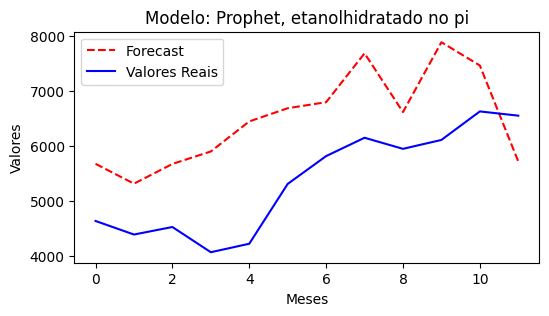

MODELO: Prophet, MAPE: 0.20603, POCID: 63.63636, PBE: 21.14173, MASE: 0.80717


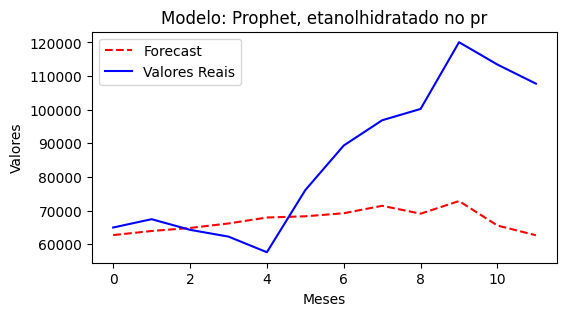

MODELO: Prophet, MAPE: 0.24930, POCID: 81.81818, PBE: 29.29204, MASE: 0.95014


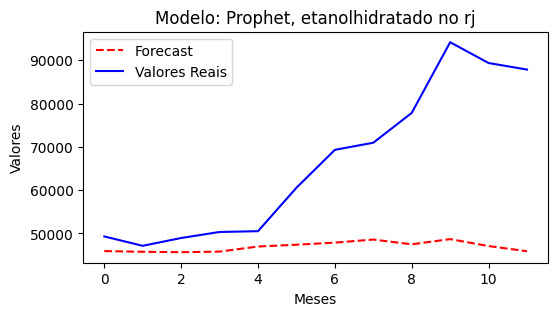

MODELO: Prophet, MAPE: 0.16021, POCID: 54.54545, PBE: -6.84528, MASE: 0.44576


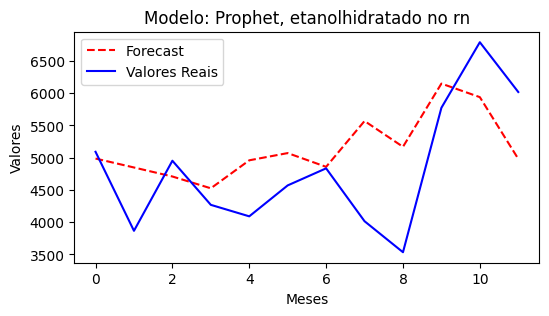

MODELO: Prophet, MAPE: 0.43089, POCID: 81.81818, PBE: 48.35383, MASE: 0.95614


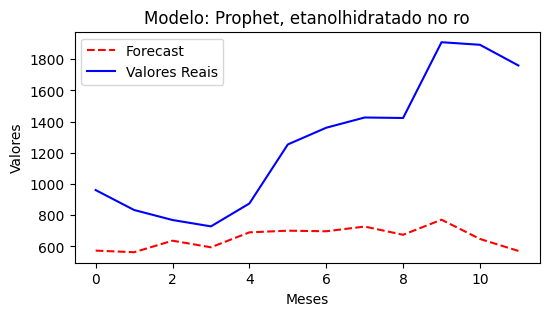

MODELO: Prophet, MAPE: 0.28465, POCID: 63.63636, PBE: 30.44927, MASE: 0.92916


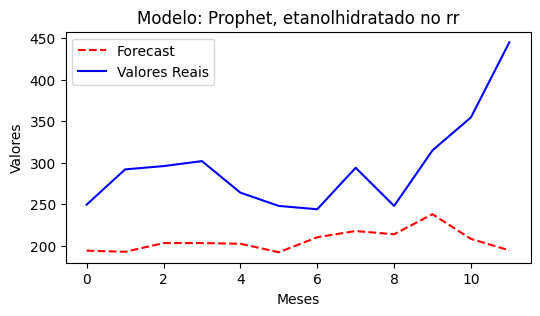

MODELO: Prophet, MAPE: 0.42795, POCID: 45.45455, PBE: 51.33830, MASE: 1.02593


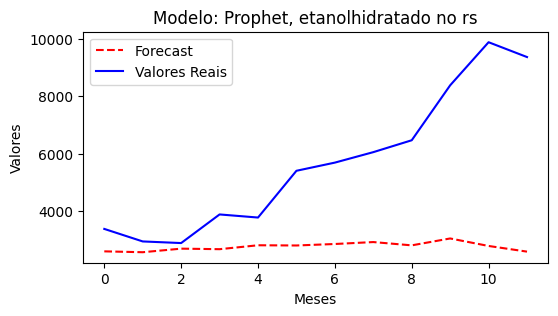

MODELO: Prophet, MAPE: 0.46633, POCID: 63.63636, PBE: 56.55288, MASE: 1.00646


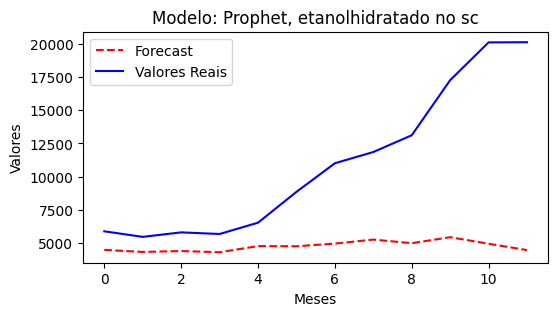

MODELO: Prophet, MAPE: 0.14670, POCID: 45.45455, PBE: 12.50910, MASE: 0.42863


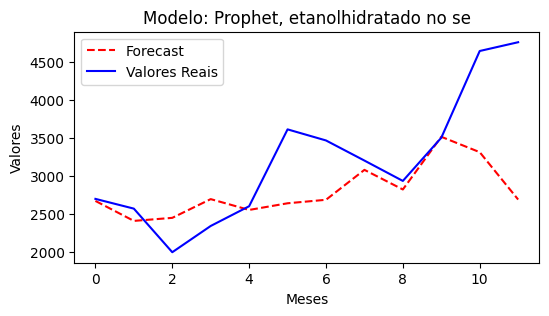

MODELO: Prophet, MAPE: 0.10069, POCID: 72.72727, PBE: 7.03925, MASE: 0.84867


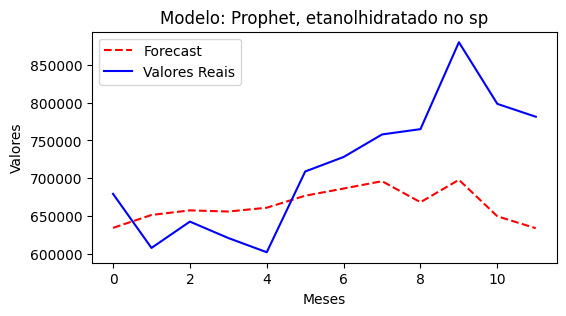

MODELO: Prophet, MAPE: 0.22688, POCID: 54.54545, PBE: 26.97538, MASE: 0.69449


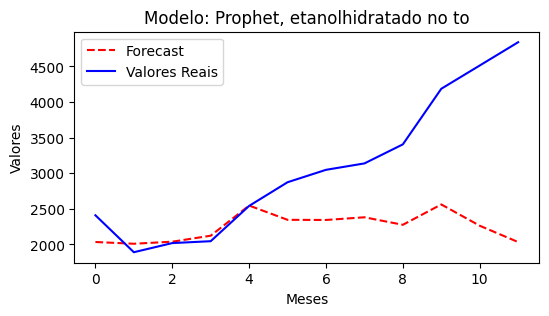

MODELO: Prophet, MAPE: 0.04781, POCID: 81.81818, PBE: 3.94037, MASE: 0.70582


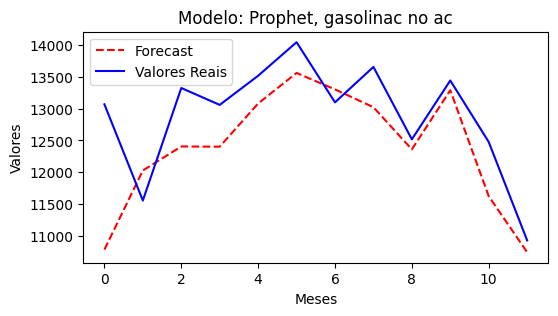

MODELO: Prophet, MAPE: 0.05867, POCID: 54.54545, PBE: 5.64306, MASE: 0.71850


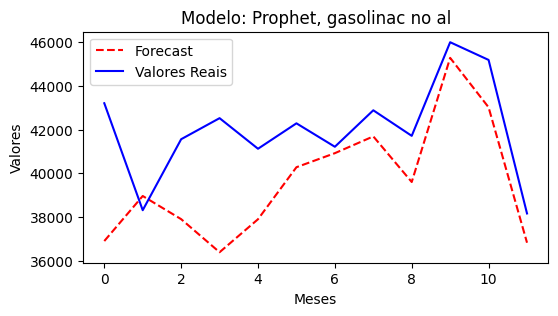

MODELO: Prophet, MAPE: 0.05315, POCID: 63.63636, PBE: -0.35464, MASE: 0.49832


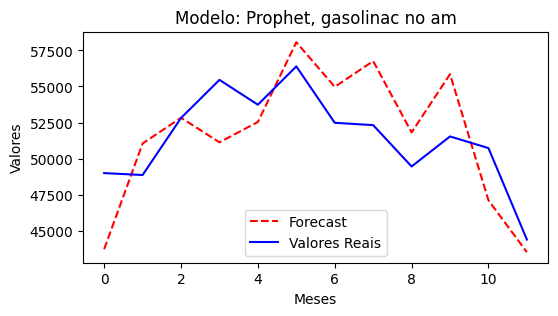

MODELO: Prophet, MAPE: 0.03510, POCID: 72.72727, PBE: 2.72482, MASE: 0.89437


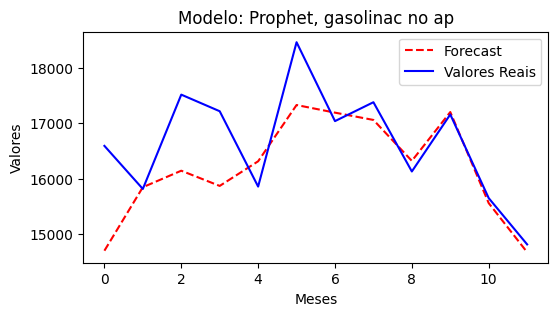

MODELO: Prophet, MAPE: 0.04789, POCID: 63.63636, PBE: 3.73376, MASE: 0.54189


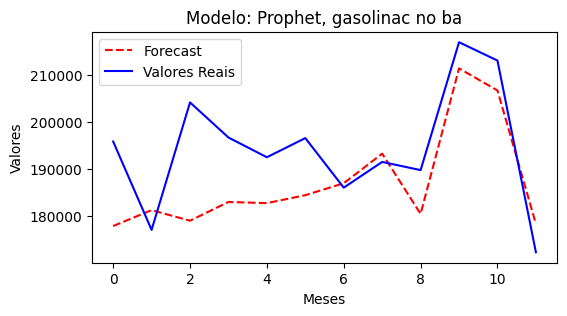

MODELO: Prophet, MAPE: 0.07093, POCID: 81.81818, PBE: 7.16829, MASE: 1.10972


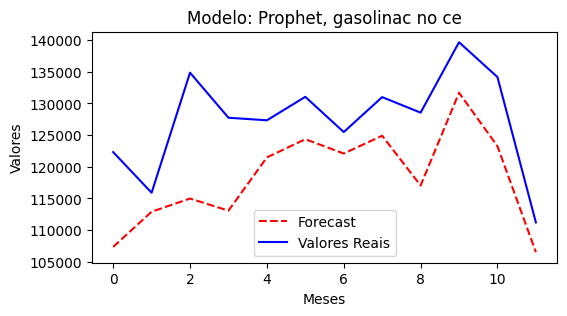

MODELO: Prophet, MAPE: 0.05847, POCID: 81.81818, PBE: -0.67372, MASE: 0.58293


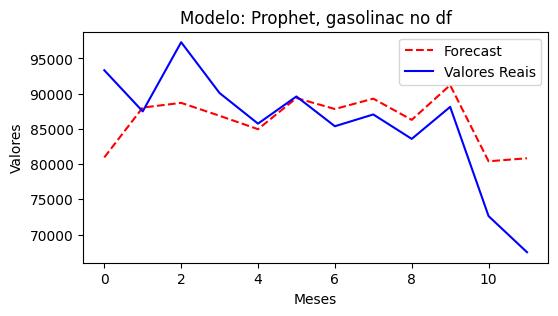

MODELO: Prophet, MAPE: 0.03782, POCID: 72.72727, PBE: -0.21199, MASE: 1.18317


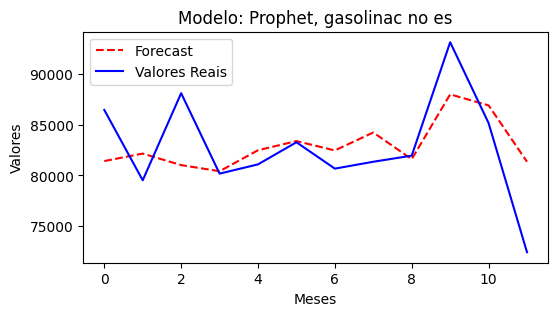

MODELO: Prophet, MAPE: 0.07728, POCID: 72.72727, PBE: 6.82076, MASE: 0.53172


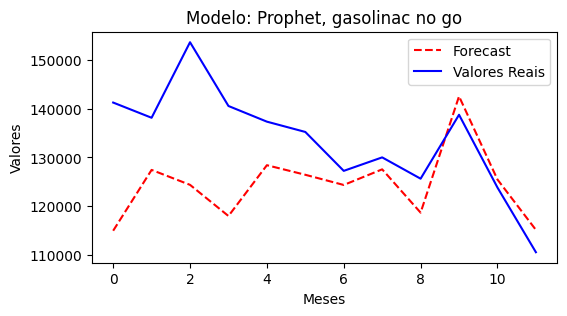

MODELO: Prophet, MAPE: 0.08346, POCID: 90.90909, PBE: 8.41509, MASE: 1.28909


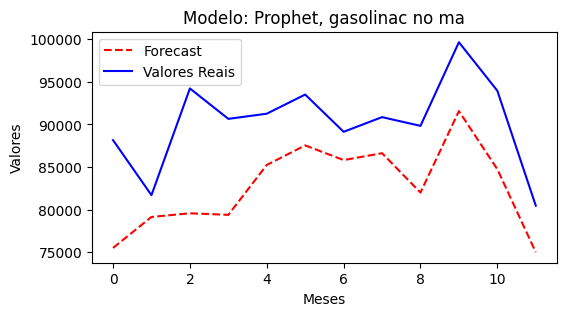

MODELO: Prophet, MAPE: 0.06606, POCID: 81.81818, PBE: 5.39456, MASE: 0.53198


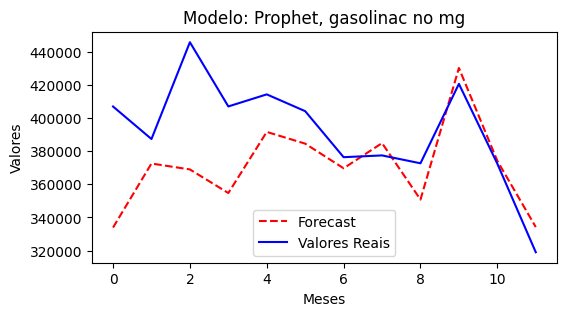

MODELO: Prophet, MAPE: 0.07374, POCID: 72.72727, PBE: 2.58397, MASE: 0.54509


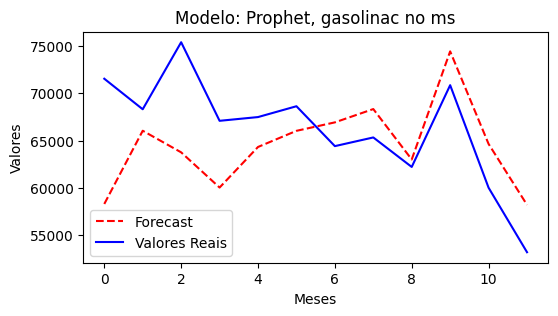

MODELO: Prophet, MAPE: 0.08048, POCID: 54.54545, PBE: 3.19908, MASE: 0.93359


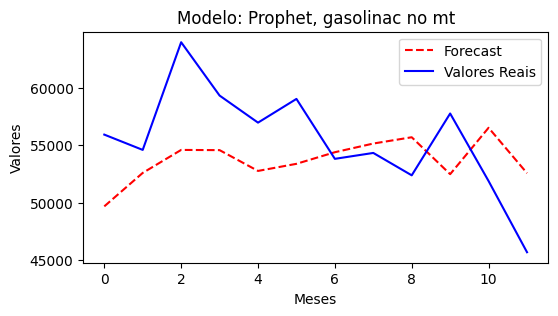

MODELO: Prophet, MAPE: 0.04269, POCID: 72.72727, PBE: 2.51273, MASE: 0.70576


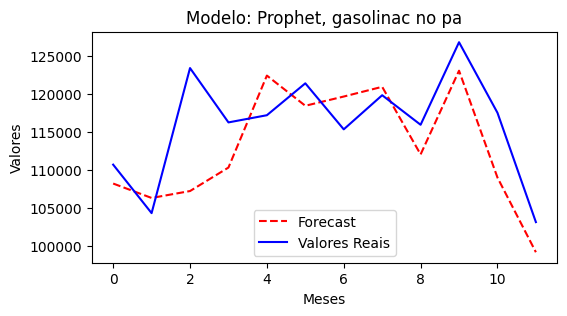

MODELO: Prophet, MAPE: 0.04503, POCID: 72.72727, PBE: 3.09115, MASE: 0.57582


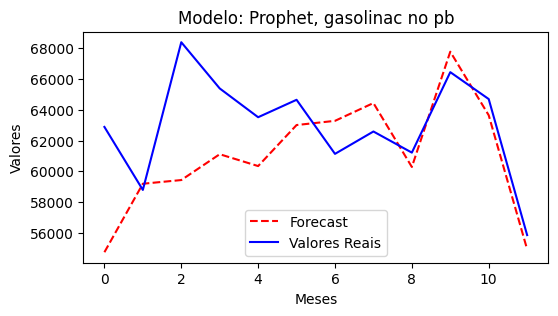

MODELO: Prophet, MAPE: 0.06529, POCID: 63.63636, PBE: 6.61962, MASE: 0.79288


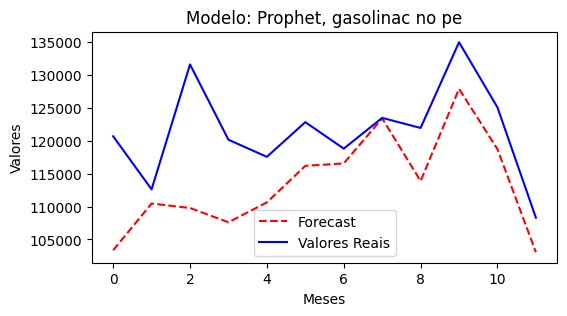

MODELO: Prophet, MAPE: 0.12211, POCID: 81.81818, PBE: 12.19023, MASE: 1.19026


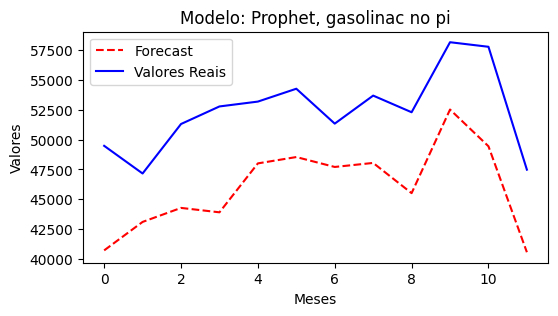

MODELO: Prophet, MAPE: 0.04920, POCID: 63.63636, PBE: 2.16313, MASE: 0.44619


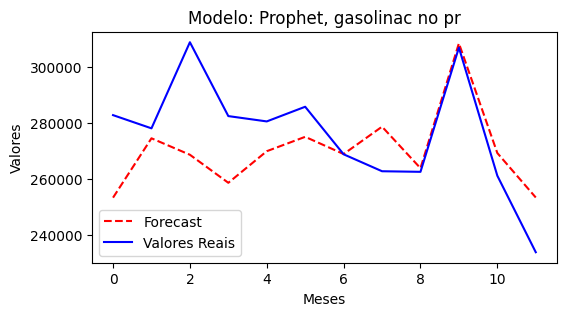

MODELO: Prophet, MAPE: 0.09451, POCID: 54.54545, PBE: 9.59825, MASE: 0.77612


KeyboardInterrupt: 

<Figure size 600x300 with 0 Axes>

In [2]:
###### Read file predictions.csv saved in UF folder #######

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

epislon = 1e-20

def pbe(y_true, y_pred):
  if np.sum(y_true)!=0:
    return 100*(np.sum(y_true-y_pred)/np.sum(y_true))
  else:
    return 100*(np.sum(y_true-y_pred)/(np.sum(y_true) + epislon))
  
def mase(y_true, y_pred, y_baseline):
  # Calcula o MAE do modelo
  mae_pred = np.mean(np.abs(y_true - y_pred))
  # Calcula o MAE do modelo baseline Persistent Window (i.e., últimas h observações antes do teste)
  mae_naive = np.mean(np.abs(y_true - y_baseline))
  if mae_naive == 0:
    result = mae_pred/(mae_naive + epislon)
  else:
    result = mae_pred/mae_naive
  return result 

def baseline_persistent_window(series, horizon):
  subsequence = (series[-horizon*2:-horizon]).values
  return subsequence

def pocid(y_true, y_pred):
  n = len(y_true)
  D = [1 if (y_pred[i] - y_pred[i-1]) * (y_true[i] - y_true[i-1]) > 0 else 0 for i in range(1, n)]
  POCID = 100 * np.sum(D) / (n-1)
  return POCID


file_path = './predictions.csv'
data = pd.read_csv(file_path, header=None)
horizon = 12

for i in range(data.shape[0]):
  # Redefine variable assignments
  product = data.iloc[i, 0]  # First cell for product
  state = data.iloc[i, 1]    # Second cell for state
  model = data.iloc[i, 2]
  predictions = data.iloc[i, 3:].tolist()  # Remaining cells for predictions
  predictions_df = pd.DataFrame(predictions, columns=['Predictions'])

  ################ Plataforma de Métricas ##############

  df = pd.read_csv(f"./uf/{product}/mensal_{state}_{product}.csv", header=0, sep=";")
  df = pd.DataFrame(df)

  y_baseline = baseline_persistent_window(df, horizon)

  # Step 1: Sort the DataFrame if needed to ensure the last 12 entries are the latest ones
  df_sorted = df.sort_values(by='timestamp', ascending=True)
  df_sorted['timestamp'] = pd.to_datetime(df_sorted['timestamp'].astype(str), format='%Y%m')
  # Step 2: Select the last 12 entries
  last_12_date = df['timestamp'].tail(12)
  last_12_m3 = df['m3'].tail(12)
  # Step 3: Create a new DataFrame with the last 12 'm3' values and assign 'product' and 'estado'
  new_df = pd.DataFrame({
              'date': last_12_date,
              'product': product,
              'state': state,
              'm3': last_12_m3.values})
  new_df = new_df.reset_index(drop=True)

  predictions_float = [float(x) for x in predictions]  # Convert each string in the list to a float

  # Create the DataFrame with float values
  predictions_df = pd.DataFrame(predictions_float, columns=['Predictions'])

  mape_result = mape(new_df['m3'], predictions_df['Predictions'])
  pocid_result = pocid(new_df['m3'], predictions_df['Predictions'])
  pbe_result = pbe(new_df['m3'], predictions_df['Predictions'])
  mase_result = mase(new_df['m3'], predictions_df['Predictions'],y_baseline[:,1])

  ############### Métricas ##############

  print(f"MODELO: {model}, MAPE: {mape_result:.5f}, POCID: {pocid_result:.5f}, PBE: {pbe_result:.5f}, MASE: {mase_result:.5f}")

  ############### Plot Predictions ##############

  import matplotlib.pyplot as plt
  import pandas as pd  # If needed to simulate DataFrame creation

  # Creating the plot
  plt.figure(figsize=(6, 3))  # Set the figure size

  # Plotting future_forecast
  plt.plot(predictions_df['Predictions'], label='Forecast', color='red', linestyle='--')

  # Plotting monthly_data_norm_last
  plt.plot(new_df['m3'], label='Valores Reais', color='blue')

  # Adding titles and labels
  plt.title(f'Modelo: {model}, {product} no {state}')
  plt.xlabel('Meses')
  plt.ylabel('Valores')

  # Showing the legend
  plt.legend()

  # Displaying the plot
  plt.show()
